In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
violin1l,violin2l,violal,cellol = [],[],[],[]
for seq in range(1,8):
    filtered_files = []
    seq = str(seq)
    for file in os.listdir('/Users/wenboyi/Desktop/HR/RR/mdRQA Pairwise Script/test/' + seq + '/'):
        if file.endswith('.' + 'csv'):
            filtered_files.append(file)
    csv_condition=pd.DataFrame()
    for filename in filtered_files:
        df = pd.read_csv('/Users/wenboyi/Desktop/HR/RR/mdRQA Pairwise Script/test/' + seq + '/' +filename)
        csv_condition = csv_condition.append(df)
    csv_condition.rename(columns={'Var1_1':'Size', 'Var1_2': 'REC','Var1_3':'DET','Var1_4':'MeanL','Var1_5':'MaxL','Var1_6':'EntrL','Var1_7':'%LAM','Var1_8':'MeanV','Var1_9':'MaxV','Var1_10':'EntrV'}, inplace=True)
    csv_condition = csv_condition.reset_index(drop=True)
    csv_condition['condition'] = ['violin1; violin2', 'violin1; viola', 'violin1; cello', 'violin2; viola', 'violin2; cello', 'viola; cello']
    violin1 = csv_condition[csv_condition['condition'].str.contains('violin1')].DET.mean()
    violin2 = csv_condition[csv_condition['condition'].str.contains('violin2')].DET.mean()
    viola =csv_condition[csv_condition['condition'].str.contains('viola')].DET.mean()
    cello =csv_condition[csv_condition['condition'].str.contains('cello')].DET.mean()
    violin1l.append(violin1)
    violin2l.append(violin2)
    violal.append(viola)
    cellol.append(cello)

In [3]:
conditionl = ['Con1','Con2','Con3','Con4','Con5','Con6','Con7']
label = ['Blind','Score-directed','Normal','Violin-isolated','Noraml_R','Concert','Haydn_end']
newcsv = pd.DataFrame(conditionl,columns = ['Condition'])
newcsv['Label'] = label
newcsv['Violin1'] = violin1l
newcsv['Violin2'] = violin2l
newcsv['Viola'] = violal
newcsv['Cello'] = cellol
newcsv = newcsv.drop([6])
newcsv
#newcsv=newcsv.T
newcsv.to_csv('B_pairwise.csv')


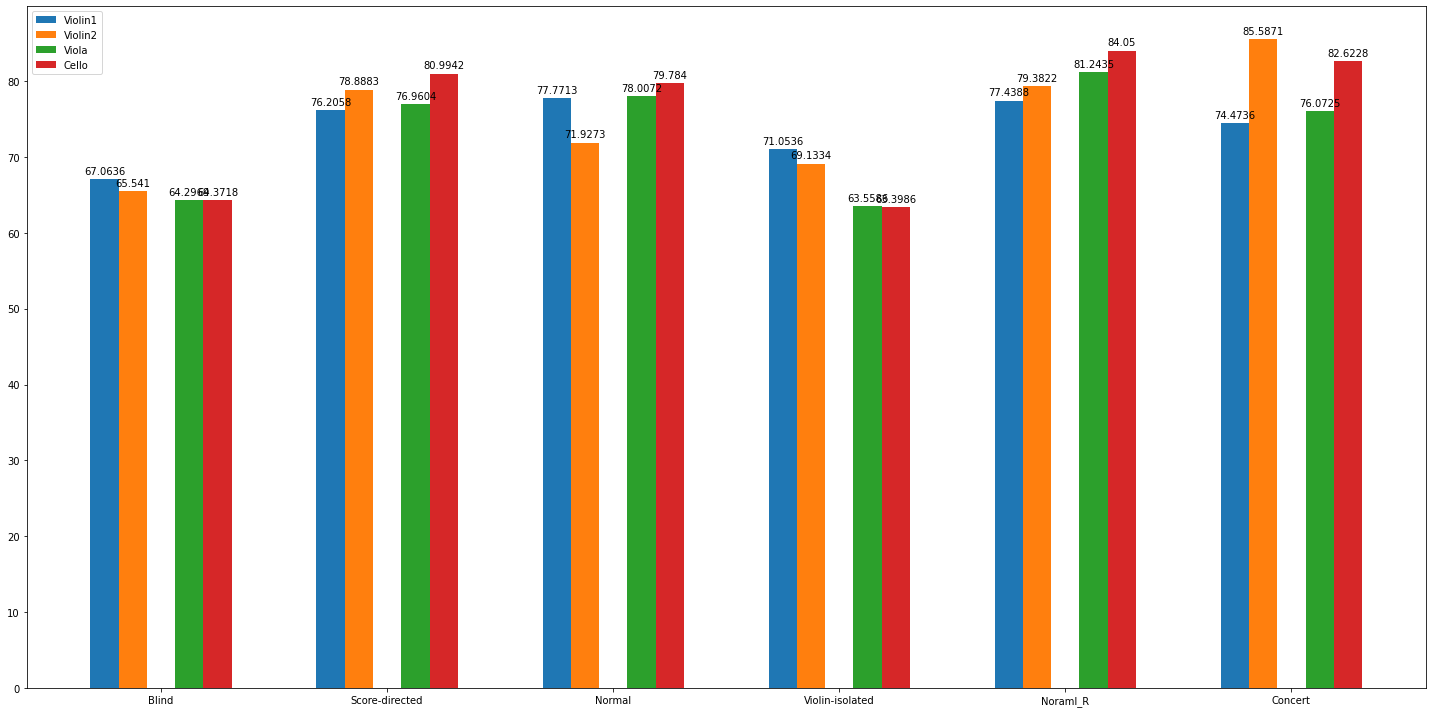

In [4]:
labels = list(newcsv.Label)
x = np.arange(len(labels))  # the label locations
plt.figure(figsize=(20, 10))
width = 0.5  # the width of the bars
rects1=plt.bar(x - width/2,newcsv.Violin1, width=width/4, label='Violin1')
rects2=plt.bar(x - width/4,newcsv.Violin2, width=width/4, label='Violin2')
rects3=plt.bar(x + width/4,newcsv.Viola, width=width/4, label='Viola')
rects4=plt.bar(x + width/2,newcsv.Cello, width=width/4, label='Cello')
plt.tight_layout()
plt.xticks(x,labels)
plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)
plt.bar_label(rects3, padding=3)
plt.bar_label(rects4, padding=3)
plt.legend()
plt.show()

In [5]:
v1 = newcsv.Violin1.mean()
v2 = newcsv.Violin2.mean()
vl = newcsv.Viola.mean()
cl = newcsv.Cello.mean()
print(v1,v2,vl,cl)

74.00112488317227 75.0765475701375 73.35652408160568 75.87021990941464
